In [1]:
import numpy as np
import pandas as pd
# from plotnine import *
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns


# Exploratory Data Analysis
Session Data (Non-Fleet)
## 4 Station and Geography


In [2]:
# do verbose sanity checks, and do not save in the end
test = False
# working on EC2 instance
cloud = True

if cloud:
    path = "../../data/"
    file = "sessions_clean.csv"
else:
    path = "/home/ourownstory/github/data/SLAC"
    file = "Charging_Session_SLAC.csv"
    
if test:
    nrows = 1e6
else:
    nrows = None
    
def get_csv():
    print("Reading {} rows of dataframe".format(nrows if nrows is not None else "ALL"))
    return pd.read_csv(path + file, index_col=False, nrows=nrows)#, low_memory=False)

In [3]:
df_raw = get_csv()
sessions = df_raw.copy(deep=True)

Reading ALL rows of dataframe


In [4]:
print(list(sessions))
# print(sessions.head(5))

['Session ID', 'Station ID', 'Port ID', 'Connector Type', 'POI Category', 'POI Subcategory', 'Session Time Zone', 'Session Time (secs)', 'Charging Time (secs)', 'Start SoC', 'End SoC', 'Full Charge', 'Energy (kWh)', 'Driver ID', 'Driver Zip', 'Vehicle Make', 'Vehicle Model', 'Battery Capacity', 'EV Type', '$ Fee', 'Fee Currency', 'Zip Code', 'City', 'County', 'State', 'Country', 'Driver City', 'Driver State', 'Driver Country', 'Max Power', 'Session Type', 'Vehicle Model Year', 'start_datetime', 'start_seconds', 'start_year', 'start_month', 'start_day', 'start_weekday']


# Station
* Max Power
* POI Category
* POI Subcategory



In [5]:
col = "Max Power"
df = sessions[col].value_counts(dropna=False)
print(df.head(20))

 6.60     11528747
 50.00      181299
 24.00       44021
 1.92        32648
 40.00          78
NaN             48
 7.20            4
Name: Max Power, dtype: int64


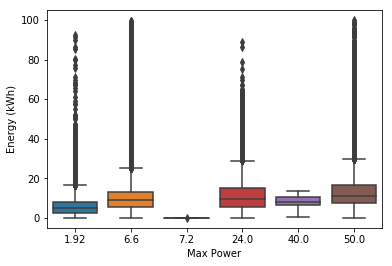

In [6]:
col1 = "Max Power"
col2 = "Energy (kWh)"

df = sessions.copy(deep=True)

x = df[col1] 
y = df[col2] 
sns.boxplot(x,y)

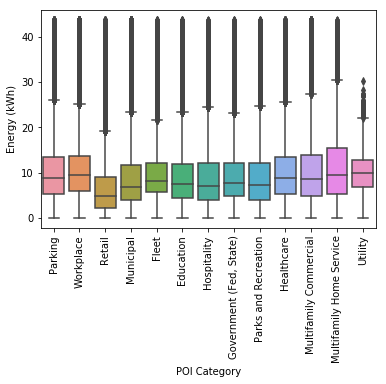

In [7]:
col1 = "POI Category"
col2 = "Energy (kWh)"
df = sessions.copy(deep=True)

df = df[df[col2] < np.percentile(df[col2], 99)]

ax = sns.boxplot(x=col1, y=col2, data=df)
ax = plt.setp(ax.get_xticklabels(), rotation=90)

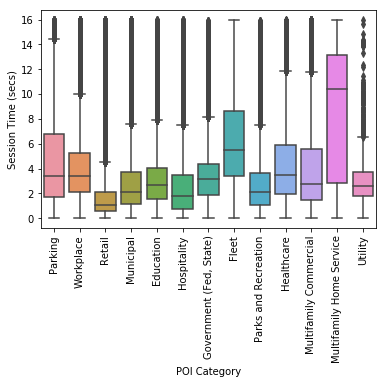

In [8]:
col1 = "POI Category"
col2 = "Session Time (secs)"
df = sessions.copy(deep=True)

df = df[df[col2] < np.percentile(df[col2], 99)]
df[col2] = df[col2] /3600

ax = sns.boxplot(x=col1, y=col2, data=df)
ax = plt.setp(ax.get_xticklabels(), rotation=90)

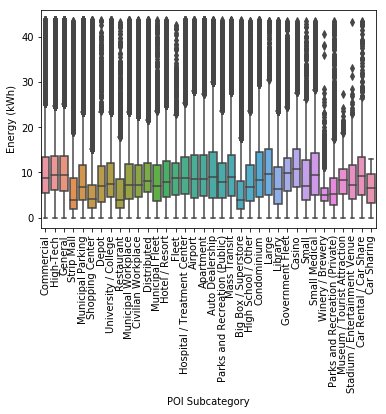

In [9]:
col1 = "POI Subcategory"
col2 = "Energy (kWh)"
df = sessions.copy(deep=True)

df = df[df[col2] < np.percentile(df[col2], 99)]

ax = sns.boxplot(x=col1, y=col2, data=df)
ax = plt.setp(ax.get_xticklabels(), rotation=90)

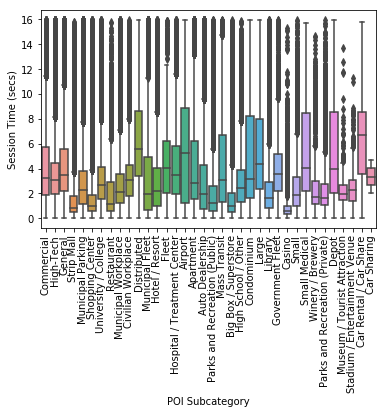

In [18]:
col1 = "POI Subcategory"
col2 = "Session Time (secs)"
df = sessions.copy(deep=True)

df = df[df[col2] < np.percentile(df[col2], 99)]
df[col2] = df[col2] /3600

ax = sns.boxplot(x=col1, y=col2, data=df)
ax = plt.setp(ax.get_xticklabels(), rotation=90)
ax.set(ylabel='Session Duration (horus)')
plt.savefig("plots/Duration_POI_Subcategory.png")

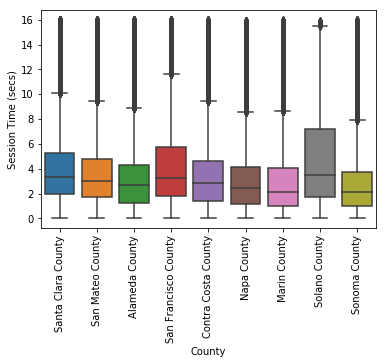

In [11]:
col1 = "County"
col2 = "Session Time (secs)"
df = sessions.copy(deep=True)

df = df[df[col2] < np.percentile(df[col2], 99)]
df[col2] = df[col2] /3600

ax = sns.boxplot(x=col1, y=col2, data=df)
ax = plt.setp(ax.get_xticklabels(), rotation=90)

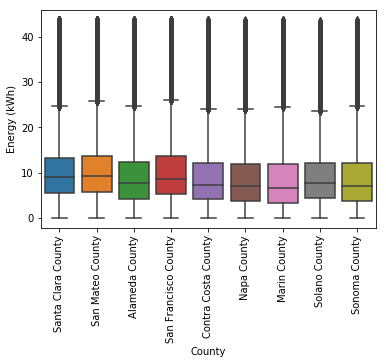

In [17]:
col1 = "County"
col2 = "Energy (kWh)"
df = sessions.copy(deep=True)

df = df[df[col2] < np.percentile(df[col2], 99)]
df[col2] = df[col2]

ax = sns.boxplot(x=col1, y=col2, data=df)
ax = plt.setp(ax.get_xticklabels(), rotation=90)
plt.savefig("plots/Energy_County.png")

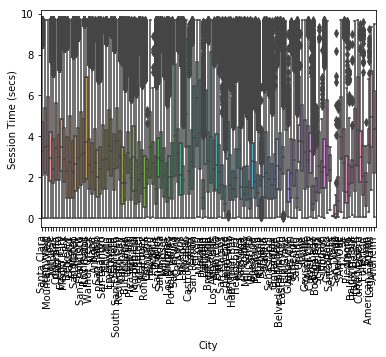

In [13]:
col1 = "City"
col2 = "Session Time (secs)"
df = sessions.copy(deep=True)

df = df[df[col2] < np.percentile(df[col2], 95)]
df[col2] = df[col2] /3600

ax = sns.boxplot(x=col1, y=col2, data=df)
ax = plt.setp(ax.get_xticklabels(), rotation=90)

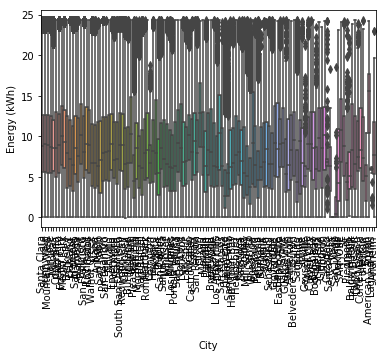

In [14]:
col1 = "City"
col2 = "Energy (kWh)"
df = sessions.copy(deep=True)

df = df[df[col2] < np.percentile(df[col2], 95)]

ax = sns.boxplot(x=col1, y=col2, data=df)
ax = plt.setp(ax.get_xticklabels(), rotation=90)

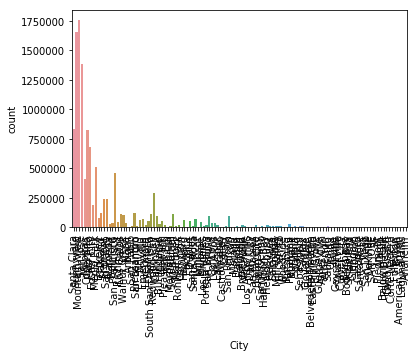

In [15]:

col = "City"
df = sessions.copy(deep=True)
# df = df[df["POI Category"] == "Municipal"]

ax = sns.countplot(x=col, data=df) #, hue="POI Category"
ax = plt.setp(ax.get_xticklabels(), rotation=90)

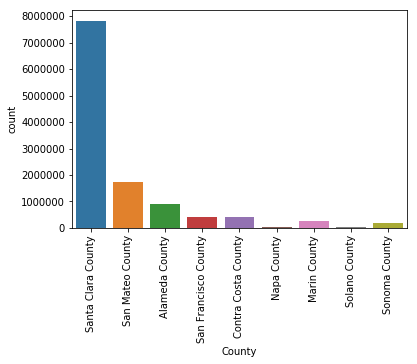

In [16]:
col = "County"
df = sessions.copy(deep=True)
# df = df[df["POI Category"] == "Municipal"]

ax = sns.countplot(x=col, data=df) #, hue="POI Category"
ax = plt.setp(ax.get_xticklabels(), rotation=90)